In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [3]:
# set seed
seed = 7
numpy.random.seed(7)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X Train:", X_train.shape, "y Train:", y_train.shape)
print("X Test:", X_test.shape, "y Test:", y_test.shape)

X Train: (60000, 28, 28) y Train: (60000,)
X Test: (10000, 28, 28) y Test: (10000,)


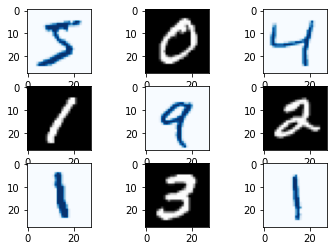

In [5]:
for i in range(9):
    plt.subplot(330+1+i)
    if i%2==1:
        plt.imshow(X_train[i], cmap=plt.get_cmap("gray"))
    else:
        plt.imshow(X_train[i], cmap=plt.get_cmap("Blues"))
# used if for my own understanding
plt.show()

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("y Train:", y_train.shape, "y Test:", y_test.shape)

y Train: (60000, 10) y Test: (10000, 10)


# Multilayer Perceptrons model

In [8]:
# reshape X_train and X_text
input_shape = X_train.shape[1] * X_train.shape[2]
Xtrain = X_train.reshape(X_train.shape[0], input_shape)
Xtest = X_test.reshape(X_test.shape[0], input_shape)
print("XTrain:", Xtrain.shape, "y Train:", y_train.shape)
print("XTest:", Xtest.shape, "y Test:", y_test.shape)

XTrain: (60000, 784) y Train: (60000, 10)
XTest: (10000, 784) y Test: (10000, 10)


In [11]:
class_count = y_train.shape[1]
print(class_count)

10


In [10]:
# define and compile model
model = Sequential()
model.add(Dense(input_shape, input_dim=input_shape, kernel_initializer='normal', activation="relu"))
model.add(Dense(class_count, kernel_initializer="normal", activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(Xtrain, y_train, validation_data=(Xtest, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 1s - loss: 0.2844 - accuracy: 0.9194 - val_loss: 0.1462 - val_accuracy: 0.9567
Epoch 2/10
300/300 - 1s - loss: 0.1122 - accuracy: 0.9674 - val_loss: 0.0900 - val_accuracy: 0.9744
Epoch 3/10
300/300 - 1s - loss: 0.0711 - accuracy: 0.9796 - val_loss: 0.0806 - val_accuracy: 0.9755
Epoch 4/10
300/300 - 1s - loss: 0.0504 - accuracy: 0.9853 - val_loss: 0.0817 - val_accuracy: 0.9752
Epoch 5/10
300/300 - 1s - loss: 0.0362 - accuracy: 0.9897 - val_loss: 0.0623 - val_accuracy: 0.9804
Epoch 6/10
300/300 - 1s - loss: 0.0276 - accuracy: 0.9927 - val_loss: 0.0630 - val_accuracy: 0.9802
Epoch 7/10
300/300 - 1s - loss: 0.0197 - accuracy: 0.9952 - val_loss: 0.0596 - val_accuracy: 0.9808
Epoch 8/10
300/300 - 1s - loss: 0.0147 - accuracy: 0.9967 - val_loss: 0.0594 - val_accuracy: 0.9812
Epoch 9/10
300/300 - 1s - loss: 0.0103 - accuracy: 0.9982 - val_loss: 0.0581 - val_accuracy: 0.9816
Epoch 10/10
300/300 - 1s - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.0633 - val_accuracy: 0.9811

In [13]:
# Final evaluation of the model
scores = model.evaluate(Xtest, y_test, verbose=0)
print("Accuracy:", scores[1]*100,"%")
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Accuracy: 98.11000227928162 %
Baseline Error: 1.89%


# Simple CNN model

In [8]:
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [9]:
# reshape to be [samples][channels][width][height]
Xtrain = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
Xtest = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print("XTrain:", Xtrain.shape, "y Train:", y_train.shape)
print("XTest:", Xtest.shape, "y Test:", y_test.shape)

XTrain: (60000, 28, 28, 1) y Train: (60000, 10)
XTest: (10000, 28, 28, 1) y Test: (10000, 10)


In [45]:
Xtrain[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [46]:
model = Sequential()
model.add(Convolution2D(32, (5, 5), padding='valid', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(class_count, kernel_initializer='normal', activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_______________________________________________

In [48]:
model.fit(Xtrain, y_train, validation_data=(Xtest, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 6s - loss: 0.3007 - accuracy: 0.9144 - val_loss: 0.0900 - val_accuracy: 0.9710
Epoch 2/10
300/300 - 6s - loss: 0.0854 - accuracy: 0.9745 - val_loss: 0.0626 - val_accuracy: 0.9807
Epoch 3/10
300/300 - 6s - loss: 0.0602 - accuracy: 0.9821 - val_loss: 0.0447 - val_accuracy: 0.9848
Epoch 4/10
300/300 - 6s - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0406 - val_accuracy: 0.9867
Epoch 5/10
300/300 - 8s - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.0341 - val_accuracy: 0.9889
Epoch 6/10
300/300 - 7s - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.0362 - val_accuracy: 0.9872
Epoch 7/10
300/300 - 7s - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0329 - val_accuracy: 0.9890
Epoch 8/10
300/300 - 7s - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0292 - val_accuracy: 0.9893
Epoch 9/10
300/300 - 6s - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0325 - val_accuracy: 0.9886
Epoch 10/10
300/300 - 6s - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0318 - val_accuracy: 0.9892

In [49]:
score = model.evaluate(Xtest, y_test, verbose=0)
print("Accuracy %.2f%%" %(score[1]*100))
print("Error %.2f%%" %((1-score[1])*100))

Accuracy 98.92%
Error 1.08%


# Larger CNN model

In [50]:
model = Sequential()
model.add(Convolution2D(30, (5,5), padding='valid', input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(15, (3,3), padding='valid', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, kernel_initializer="normal", activation='relu'))
model.add(Dense(50, kernel_initializer="normal", activation="relu"))
model.add(Dense(class_count, kernel_initializer="normal", activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)             

In [53]:
model.fit(Xtrain, y_train, validation_data=(Xtest, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 7s - loss: 0.5281 - accuracy: 0.8393 - val_loss: 0.1190 - val_accuracy: 0.9637
Epoch 2/10
300/300 - 7s - loss: 0.1302 - accuracy: 0.9606 - val_loss: 0.0638 - val_accuracy: 0.9800
Epoch 3/10
300/300 - 7s - loss: 0.0886 - accuracy: 0.9724 - val_loss: 0.0487 - val_accuracy: 0.9849
Epoch 4/10
300/300 - 7s - loss: 0.0694 - accuracy: 0.9784 - val_loss: 0.0403 - val_accuracy: 0.9869
Epoch 5/10
300/300 - 7s - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0383 - val_accuracy: 0.9874
Epoch 6/10
300/300 - 7s - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0316 - val_accuracy: 0.9899
Epoch 7/10
300/300 - 7s - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0277 - val_accuracy: 0.9908
Epoch 8/10
300/300 - 8s - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0277 - val_accuracy: 0.9909
Epoch 9/10
300/300 - 8s - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0279 - val_accuracy: 0.9911
Epoch 10/10
300/300 - 7s - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0245 - val_accuracy: 0.9915

In [54]:
score = model.evaluate(Xtest, y_test, verbose=0)
print("Accuracy %.2f%%" %(score[1]*100))
print("Error %.2f%%" %((1-score[1])*100))

Accuracy 99.15%
Error 0.85%


# Own network topology #1

In [19]:
model = Sequential()
model.add(Convolution2D(32, (5,5), padding='valid', input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(60, (3,3), padding='valid', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, kernel_initializer="normal", activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, kernel_initializer="normal", activation="relu"))
model.add(Dense(class_count, kernel_initializer="normal", activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [20]:
model.summary()
# 832 -->  5*5 filter = 25 + 1 (activation) = 26, 26*32 = 832
# 17340 --> 3*3 filter = 9 * 32 filters (each from previous layer) = 288 + 1 (activation) = 289 * 60 = 17340
# 192128 --> 1500 + 1(activation) * 128 = 192128
# 6450 --> 128 + 1(activation) * 50 = 6450
# 510 --> 50 + 1(activation) * 10 = 510
# Total --> 217,260(by adding all above parameters)
# This count is parameter to be learned while training

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 60)        17340     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 60)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 60)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1500)             

In [21]:
model.fit(Xtrain, y_train, validation_data=(Xtest, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 9s - loss: 0.4728 - accuracy: 0.8519 - val_loss: 0.1061 - val_accuracy: 0.9670
Epoch 2/10
300/300 - 10s - loss: 0.1151 - accuracy: 0.9641 - val_loss: 0.0533 - val_accuracy: 0.9825
Epoch 3/10
300/300 - 10s - loss: 0.0820 - accuracy: 0.9746 - val_loss: 0.0412 - val_accuracy: 0.9860
Epoch 4/10
300/300 - 9s - loss: 0.0651 - accuracy: 0.9801 - val_loss: 0.0345 - val_accuracy: 0.9892
Epoch 5/10
300/300 - 10s - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0302 - val_accuracy: 0.9895
Epoch 6/10
300/300 - 9s - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0298 - val_accuracy: 0.9902
Epoch 7/10
300/300 - 9s - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.0287 - val_accuracy: 0.9905
Epoch 8/10
300/300 - 9s - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0283 - val_accuracy: 0.9910
Epoch 9/10
300/300 - 9s - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0249 - val_accuracy: 0.9919
Epoch 10/10
300/300 - 9s - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.0216 - val_accuracy: 0.9

In [22]:
score = model.evaluate(Xtest, y_test, verbose=0)
print("Accuracy %.2f%%" %(score[1]*100))
print("Error %.2f%%" %((1-score[1])*100))

Accuracy 99.32%
Error 0.68%
